# Music, how come? A python approach to an old and heavy theory

Have you ever thought about it? How sound is generated? How can we give a face to something that is not visible?
In order to draw the first lines, we need to understand how sound is brought to life and then to the digital world.


When we hit the guitar string

![](https://media3.giphy.com/media/YxeWytfutfU5i/source.gif)

 it forces the air around it to oscilate as it moves. The air will carry the string vibration inducing our eardrum to vibrate as well. The eardrum alongside with a group of bones in the midle ear (Malleus, Incus and Stapes) will make the tiny hairs inside our inner ear (cochlea) vibrate into electrical pulses through the hearing nerve giving us the notion of sound!

![](https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcStkwXU5jC957UgfM36twDp326G_vgFYd9sR0taI3GH_rx82gqg)

# Yeah, this is pretty amazing. But involves a lot of biological explanations and you are still holding out the Python.

![](https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcQ5gk5tRKXQtjw_akXQ8Sc2wguZpsDBkxXJIIpTVrOm3rgS7hjH)


The way that the microphone will translate those waves into something that is "computable" is pretty the same.

![](https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcSXElAXEIkhqgDksKlXcW6zPVtmYjUMp2VoqQ1a_8qqU9NpH61q)

I guy called Emile Berliner

![](https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcT31mFtGc-U-PBSbETHdIat-JhkWvyVqwH7YuDSEifv697ylNKp)

was able to create a device able to vibrate with the sound carried in the wind and by this vary the "resistance" (the right term is impedance) in a given circuit. This impedance variation couses a the difference of tension vary in the "same" shape as the original string was vibrating.

## Resolution
![](https://media.giphy.com/media/xT0xeDRRrPFvjXfZF6/giphy.gif)

In the real world things have infinite resolution. Take out vision as an example, we can always amplify it with magnifiers, microscopes. We know for a fact that the only limitation for zooming is the lens capacity. In the digital world we have a harder limitation: **Memory**. In the computer when we zoom into a picture, as good as they can be, there will be a moment when the pixels will start to appear. To collect sound "pixels" (samples) to represent the sounds that we are gonna hear we will use a frequency that always get the samples with the same intervals. We will call this collection frequency sampling frequency and it will be the amount of samples we will collect in a time interval. We will find in the *Système international d'unités* (SI) a unity to anotate frequency and it is named after Heinrich
![](https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcTkcbL_P8yEkDUIxNL1pgFVSyGjsa9CRFNb__Mm2Nu1M5cTYGBb)
Hertz.

Ok, less biology, but, still, no Python.

![](https://images.idgesg.net/images/article/2018/07/python-100763894-large.jpg)


## to the code!

In [1]:
import os
import json
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML

ffmpg_path = os.path.abspath(r'C:\Users\pedro\OneDrive\Área de Trabalho\math_s\ffmpeg-20191101-53c21c2-win64-static\bin\ffmpeg.exe')
# os.environ['path'] += ';' + ffmpg_path
plt.rcParams['animation.ffmpeg_path'] = ffmpg_path

First lets create an array with all the time intervals where we will have samples between 0 and 5 seconds using 100Hz as our sampling frequency.

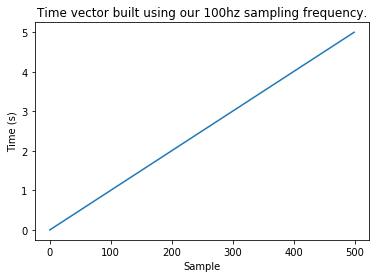

In [2]:
sampling_frequency = 100
time = 5
time_vector = np.linspace(0, time, int(sampling_frequency * time))
plt.plot(time_vector)
plt.ylabel('Time (s)')
plt.xlabel('Sample')
plt.title('Time vector built using our 100hz sampling frequency.')
plt.show()

As we can see, from 5 seconds of sample intervals using 100Hz generates 500 sample intervals. 

All this big explanation about how the air propages the vibrations in the string was to tell you that sound waves have a very similar shape to what we see in that guitar gif.
So isn't this:
![](https://media3.giphy.com/media/YxeWytfutfU5i/source.gif)

Close to this:

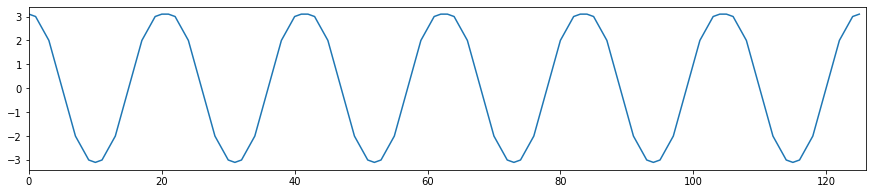

In [3]:
nrepetitions = 6
voltages = nrepetitions * [3.1, 3, 2.5, 2,  1, 0, -1, -2, -2.5, -3, -3.1, -3, -2.5, -2, -1, 0, 1, 2, 2.5, 3, 3.1]
plt.figure(figsize=(15, 3))
plt.plot(voltages)
plt.xlim([0, len(voltages)])
plt.show()

Yes, sound waves are very similar to senoids and, in order to emulate sound wave recordings, we are gonna use simple cosine generataions. Sound waves have 3 very important properties to us to :

* Wave Length (or lambda)
* Volume (or amplitude)
* Speed (the name is speed)
* Frequency (wow again?!)

In [4]:
def cosine(time_vector, f, amplitude=1, phase=2, norm_above_zero=True):
    cos = np.cos(phase * np.pi * f * time_vector)
    if norm_above_zero:
        minimun = np.min(cos)
        if 0 > minimun:
            cos -= minimun
        cos /= np.max(cos) 
    return amplitude * cos

In [5]:
def plot_freq_points(frequency, time, x_offset=0, y_offset=0):
    period = 1 / frequency
    for i in np.arange(0, time + period, period):
        plt.plot(i + x_offset, y_offset, marker='o', color='r')

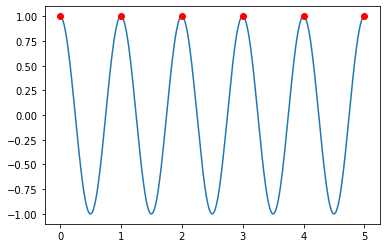

In [7]:
cos_1hz = cosine(time_vector, 1, 1, 2, False)
plt.plot(time_vector, cos_1hz)
plot_freq_points(1, 5, 0, 1)
plt.show()

* Amplitude will be the volume of our sound and its mesured by the distance between the peeks and the vailes from the center of the wave.
* Wave length will be the distance between two red dots, where the hole wave cycle repeats itself.
* **Frequency** will be how many complete cycles passes throught an specific point.
* Speed is the velocity where the wave will travel through the mediums.

- All of this will give us the first formula:

![](http://sdsu-physics.org/physics180/physics180A/units/unit3/images_unit3/periodic_motion_eq.gif)

Velocity will be dictated by the medium that the wave will travel and usually is constant under controlled temperature, pression and medium density (in the air at 20 C the sound will travel at 343m/s). Frequency will be dicated by the wave generator and will remain constant as long as the recepetion point does not move. Wavelength is different because something will need to change when sound travel from one medium to another.

I know that's a lot of information, but care no more, we will only need frequency for now.

You should be asking yourself: 
    - Why some strings were vibrating "more" than others in that guitar giff?
If we break this sentence into what we are talking. We will understand that "vibrate more" is when we notice that there are more repetitions of wave cycles in the same period of time, thus we are notificing a higher frequency. Another thing is, the higher the string note was more cycles we were able to notice in the same period.

**YES**, the tune of the sound wave will be dictated by its frequency!

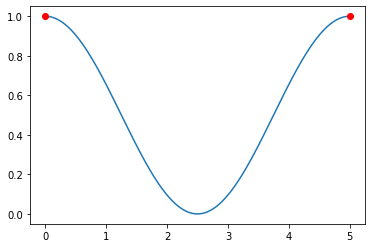

In [10]:
cos_02hz = cosine(time_vector, 0.2)
plt.plot(time_vector, cos_02hz)
plot_freq_points(0.2, time, y_offset=1)
plt.show()

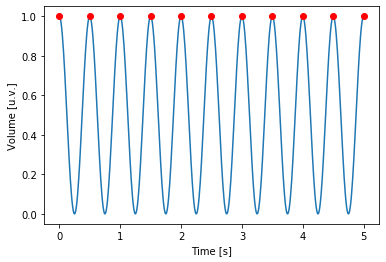

In [13]:
cos_2hz = cosine(time_vector, 2)
plt.plot(time_vector, cos_2hz)
plot_freq_points(2, time, y_offset=1)
plt.xlabel('Time [s]')
plt.ylabel('Volume [u.v.]')
plt.show()

Based on the behavior that we can notice in the cosines and, by approximation, we can try to make the first algorithm to automagically find frequencies! We will follow some steps: 

1. find all the peeks and vales.
1. calculate the wave length in seconds.
1. calculate the frequency by dividing the number of peeks and vales divided by 2
1. then divided by the wave length.

In [20]:
def find_frequency(signal, freq=sampling_frequency):
    going_up = signal[0] > signal[1]
    going_down = signal[0] < signal[1]

    wave_length_s = len(signal) / freq
    print(f'Wave duration: {wave_length_s}s')
    print()
    peeks, vales = 0, 0
    sample_t_1 = signal[0]
    for i, sample_t in enumerate(signal[1:]):
        if (sample_t > signal[i]) and going_down:
            peeks += 1
            going_down = False
            going_up = True

        elif (signal[i] > sample_t) and going_up:
            vales += 1
            going_up = False
            going_down = True
            
        frequency = ((peeks + vales) / 2) / wave_length_s
    print(f'Found {peeks} peek(s) in {wave_length_s}s.')
    print(f'Found {vales} vale(s) in {wave_length_s}s.')
    print(f'The calculated frequency is {frequency}hz.')
    print()   

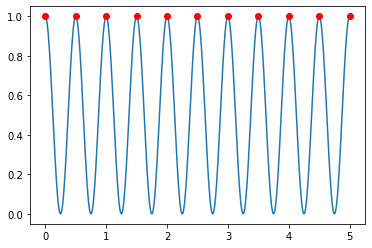

Wave duration: 5.0s

Found 10 peek(s) in 5.0s.
Found 10 vale(s) in 5.0s.
The calculated frequency is 2.0hz.



In [21]:
cos_2hz = cosine(time_vector, 2)
plt.plot(time_vector, cos_2hz)
plot_freq_points(2, time, y_offset=1)
plt.show()
find_frequency(cos_2hz)

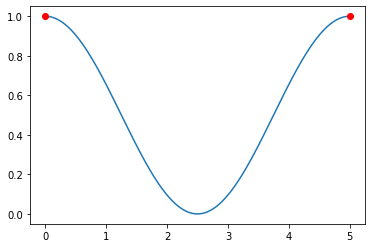

Wave duration: 5.0s

Found 1 peek(s) in 5.0s.
Found 1 vale(s) in 5.0s.
The calculated frequency is 0.2hz.



In [22]:
cos_02hz = cosine(time_vector, 0.2)
plt.plot(time_vector, cos_02hz)
plot_freq_points(0.2, time, y_offset=1)
plt.show()
find_frequency(cos_02hz)

Ok, all is going almost fine, but we will not try to find the notes from a monophonic music right? And our ambition will be our doom.

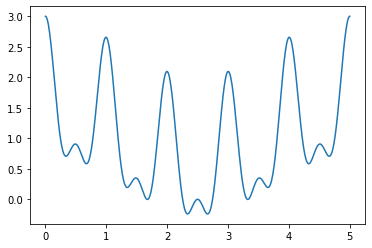

Wave duration: 5.0s

Found 10 peek(s) in 5.0s.
Found 10 vale(s) in 5.0s.
The calculated frequency is 2.0hz.



In [23]:
combined_cosine_vector = cos_02hz + cos_2hz + cos_1hz
plt.plot(time_vector, combined_cosine_vector)
plt.show()
find_frequency(combined_cosine_vector)

What is happenning here? Lets attenuate some amplitudes in order to see the behavior of the combined waves... Look closely!

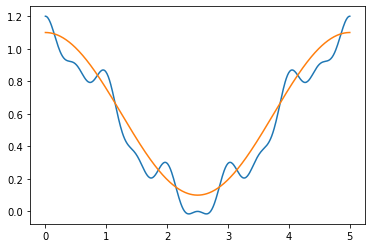

In [26]:
combined_cosine_vector = cos_02hz + 0.1 * cos_2hz + 0.1 * cos_1hz
plt.plot(time_vector, combined_cosine_vector)
plt.plot(time_vector, cos_02hz + 0.1)
plt.show()

## And now?!

There was a guy, once, that proposed a *winding* machine. The principle behind it is pretty complex so to unlock the secret of this machine we will need to force oversimplify it. The first principle is the Leonhard Identity: 
![](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRcvUTQuvMR2mt5NFA-VoU4vxnom8gLQkm_8QbfGncgL0ReLtn1&s)
Euler!

This guy, mapped a lot of things like:

* $\cos(\theta)^2 + \sin(\theta)^2 = 1$
* $\cos(2\theta) = \cos(\theta)^2 - \sin(\theta)^2$

Most of this "equalities" were based on those triangle operations like Pitagoras:

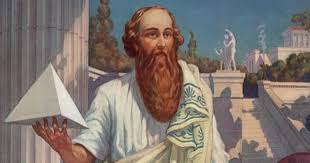

Isolated cosines and sines will always be numbers between 0 and 1. What we will try to do is to find combinations of cosines and sines to multiplicate our Wave. By doing so, when the the frequencies match, their product will be close to the components amplitude.

We are generating our cosines using:
$\cos(2f\pi)$
to try to match this we will use: